In [ ]:
#дз 2

# Установка нужных версий пакетов


In [ ]:
#pip install numpy==1.26.4 scipy==1.13.1 gensim==4.3.3


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
#pip install thinc==8.3.6

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [ ]:
import numpy as np
print(np.__version__)


1.26.4


In [ ]:
#!pip install evaluate

In [ ]:
# Установка необходимых пакетов
#!pip install pymorphy2==0.9.1 nltk

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Используется устройство:", device)


Используется устройство: cuda


## Загрузка данных

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [ ]:
import os

print(os.listdir())


['.config', 'best_thresholds_cnn.npy', 'submission.csv', 'train (1).csv', 'best_thresholds_lstm.npy', 'train (3).csv', 'best_multilabel_bert.pt', 'test (2).csv', 'best_lstm_embed.pt', 'train (2).csv', 'best_thresholds_w2v.npy', 'best_thresholds.npy', 'train.csv', 'test (1).csv', 'best_w2v_mlp.pt', 'best_thresholds_tfidf.npy', 'test.csv', 'best_cnn_embed.pt', 'best_tfidf_mlp.pt', 'test (3).csv', 'sample_data']


In [ ]:
import pandas as pd

train_df = pd.read_csv('train.csv')
print(train_df.head())
print(train_df.info())
print(train_df['text'][0])
print(train_df['labels'][0])

   id                                               text  \
0   0  15 января\nДетская развлекательная программа\n...   
1   1  13 и 14 августа\nВыходные в Меге\nhttps://t.me...   
2   2  Йокнапатофа\nПостановка Театр им. Маяковского\...   
3   3  Впервые в Уфе танцевальная терапия в группе с ...   
4   4  🎹\nGRAND PIANO COMPETITION\n🎹\nДрузья, сегодня...   

                                    labels  
0  1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1  
1  0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1  
2  0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1  
3  1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0  
4  1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29568 entries, 0 to 29567
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29568 non-null  int64 
 1   text    29568 non-null  object
 2   labels  29568 non-null  object
dtypes: int64(1), object(2)
memory usage: 693.1+ KB
None
15 января
Детская развле

In [ ]:
import numpy as np
import pandas as pd

# Загрузка данных
train_df = pd.read_csv('train.csv')

# Преобразуем строку '1 0 0 1' → [1, 0, 0, 1]
train_df['label_vector'] = train_df['labels'].apply(lambda x: list(map(int, x.strip().split())))

# Переводим в numpy-массив
labels_array = np.array(train_df['label_vector'].tolist())
print(labels_array.shape)  # Должно быть (n_samples, 20)


(29568, 20)


# Анализируем данные

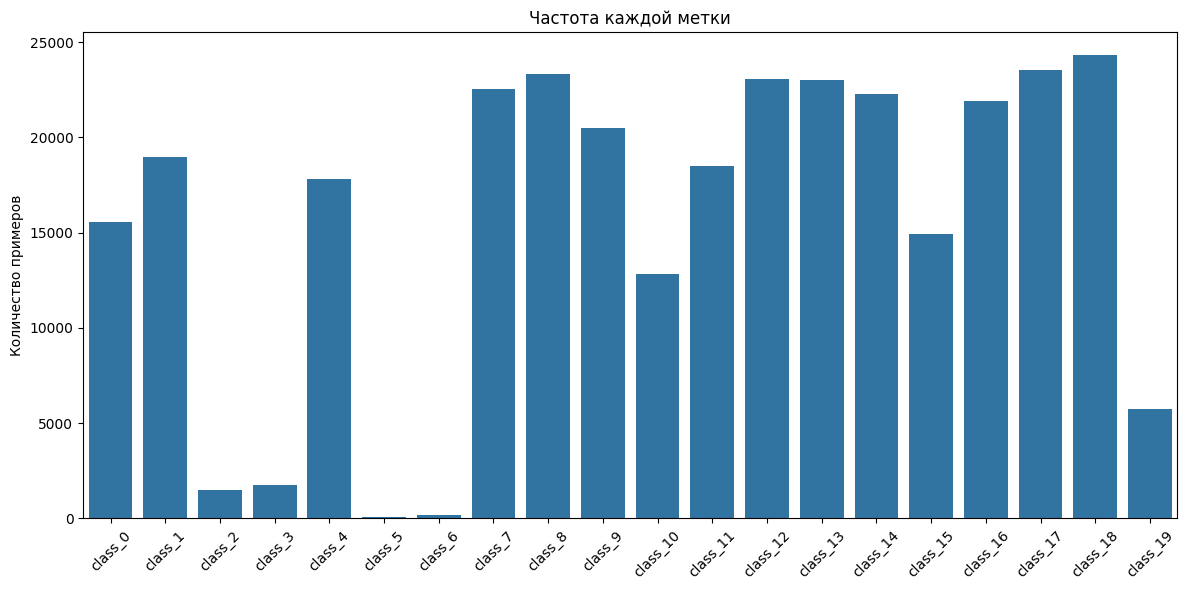

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_names = [f"class_{i}" for i in range(labels_array.shape[1])]
label_counts = labels_array.sum(axis=0)

plt.figure(figsize=(12, 6))
sns.barplot(x=label_names, y=label_counts)
plt.title("Частота каждой метки")
plt.ylabel("Количество примеров")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


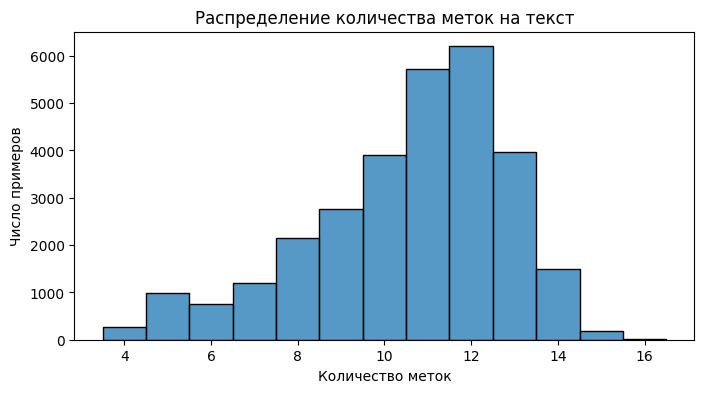

In [ ]:
n_labels_per_example = labels_array.sum(axis=1)

plt.figure(figsize=(8, 4))
sns.histplot(n_labels_per_example, bins=range(1, n_labels_per_example.max() + 2), discrete=True)
plt.title("Распределение количества меток на текст")
plt.xlabel("Количество меток")
plt.ylabel("Число примеров")
plt.show()


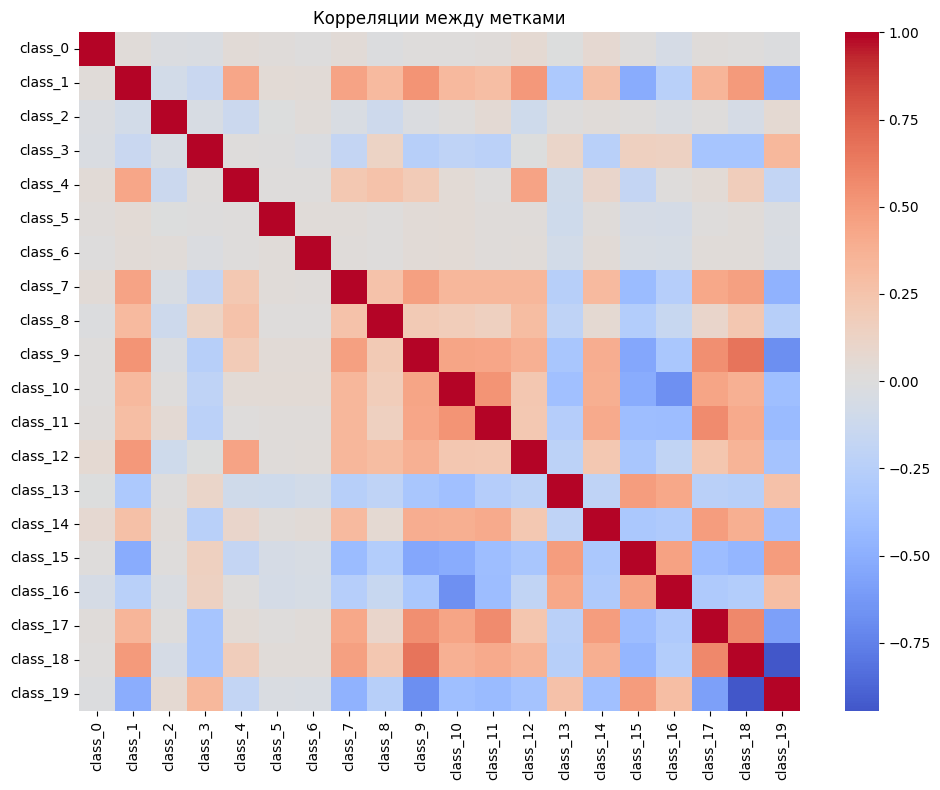

In [ ]:
corr_matrix = np.corrcoef(labels_array.T)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, xticklabels=label_names, yticklabels=label_names, cmap='coolwarm', center=0)
plt.title("Корреляции между метками")
plt.tight_layout()
plt.show()


In [ ]:

print("▶ Примеры текстов для каждой метки (по одному):\n")

for class_idx in range(labels_array.shape[1]):
    example_idx = np.where(labels_array[:, class_idx] == 1)[0]
    if len(example_idx) == 0:
        print(f"Метка class_{class_idx}: нет ни одного примера")
        continue
    example_text = train_df.iloc[example_idx[0]]['text']
    print(f"\n🔹 Метка class_{class_idx} (первый найденный пример):")
    print(example_text.strip())


▶ Примеры текстов для каждой метки (по одному):


🔹 Метка class_0 (первый найденный пример):
15 января
Детская развлекательная программа
15-00 бесплатно
❗️
@
cafeotdyh
Кафе "Отдых"
📍
Запись обязательно +73472228532

🔹 Метка class_1 (первый найденный пример):
Впервые в Уфе танцевальная терапия в группе с практикующим психологом
Тема встречи: «Отношения. Доверие. Контакт»
Приходите, если:
🔸
вы хотите наладить или поисследовать свои отношения с
-  телом
- собой
- близким человеком
- работой
- деньгами
🔸
не можете разрешить или забыть какую-то  ситуацию, связанную с отношениями
🔸
не умеете доверять или делегировать
🔸
тяжело вступаете в контакт
Задать вопрос психологу курса
и записаться можно здесь:
@LeontevaKsenia
Дата
: 26 января
Время
: 19.00-21.00
Адрес
: Коммунистическая, 45/3, Б/ц "Деловой двор"
Стоимость: 1500
Что нужно для занятия:
удобная одежда, носки, вода, желание танцевать.

🔹 Метка class_2 (первый найденный пример):
Концерт «Мамульки Бенд» - электронный сгусток музыкальных пар

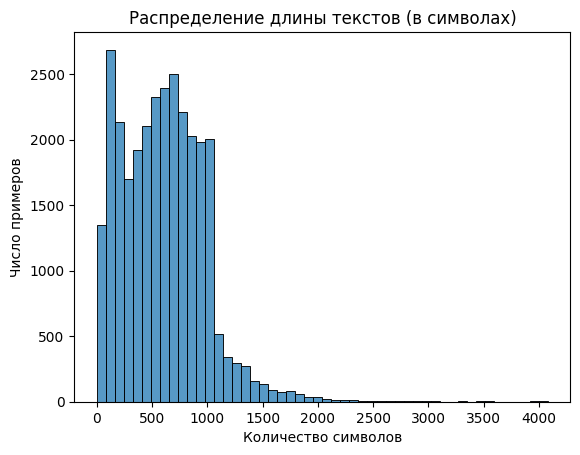

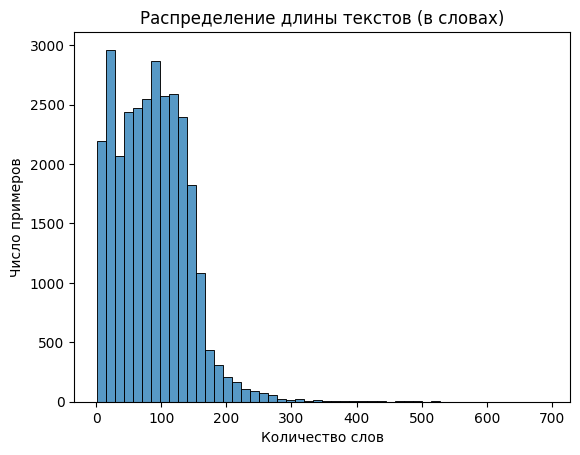

In [ ]:
train_df['char_len'] = train_df['text'].apply(len)
train_df['word_len'] = train_df['text'].apply(lambda x: len(x.split()))

# Гистограмма по символам
sns.histplot(train_df['char_len'], bins=50)
plt.title("Распределение длины текстов (в символах)")
plt.xlabel("Количество символов")
plt.ylabel("Число примеров")
plt.show()

# Гистограмма по словам
sns.histplot(train_df['word_len'], bins=50)
plt.title("Распределение длины текстов (в словах)")
plt.xlabel("Количество слов")
plt.ylabel("Число примеров")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


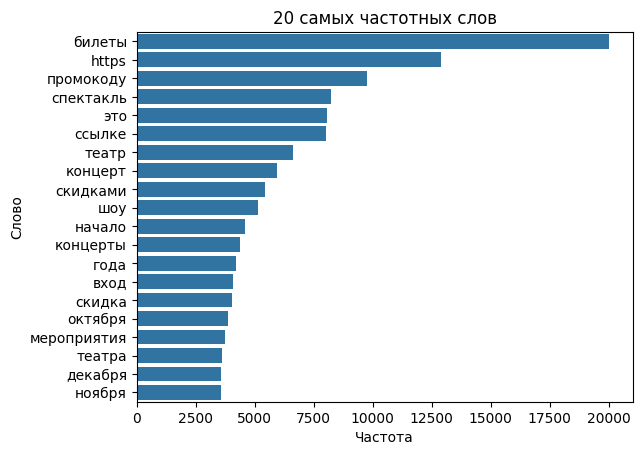

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words("russian"))  # или "english"

def tokenize(text):
    words = re.findall(r'\b\w+\b', text.lower())  # только слова
    return [w for w in words if w not in stop_words and len(w) > 2]

all_tokens = train_df['text'].apply(tokenize)
flat_tokens = [token for sublist in all_tokens for token in sublist]
word_counts = Counter(flat_tokens)

# Топ-20 слов
most_common = word_counts.most_common(20)
words, freqs = zip(*most_common)

sns.barplot(x=freqs, y=words)
plt.title("20 самых частотных слов")
plt.xlabel("Частота")
plt.ylabel("Слово")
plt.show()


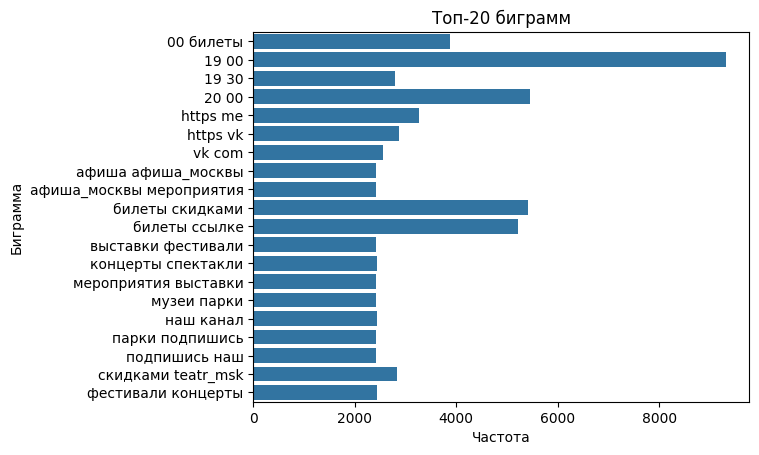

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words = list(stopwords.words("russian"))  # ← тут приведение к списку

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words, max_features=20)
X = vectorizer.fit_transform(train_df['text'])
bigrams = vectorizer.get_feature_names_out()

sns.barplot(x=np.array(X.sum(axis=0)).flatten(), y=bigrams)
plt.title("Топ-20 биграмм")
plt.xlabel("Частота")
plt.ylabel("Биграмма")
plt.show()


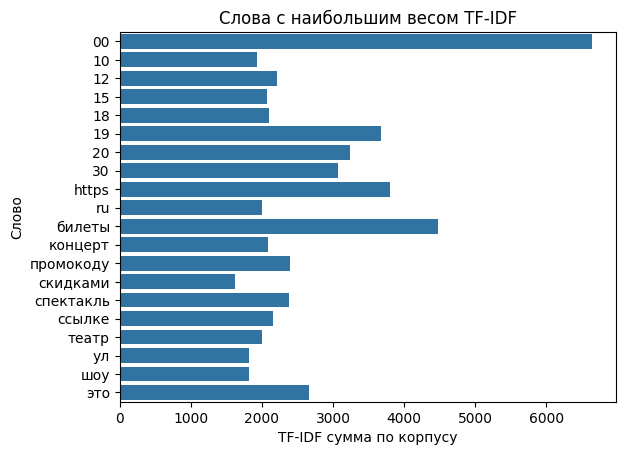

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=20, stop_words=stop_words)
X_tfidf = tfidf.fit_transform(train_df['text'])
important_words = tfidf.get_feature_names_out()

sns.barplot(x=np.array(X_tfidf.sum(axis=0)).flatten(), y=important_words)
plt.title("Слова с наибольшим весом TF-IDF")
plt.xlabel("TF-IDF сумма по корпусу")
plt.ylabel("Слово")
plt.show()


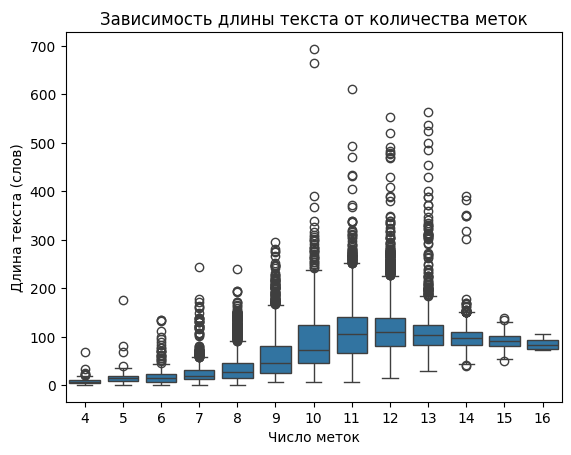

In [ ]:
train_df['n_labels'] = labels_array.sum(axis=1)
sns.boxplot(data=train_df, x='n_labels', y='word_len')
plt.title("Зависимость длины текста от количества меток")
plt.xlabel("Число меток")
plt.ylabel("Длина текста (слов)")
plt.show()


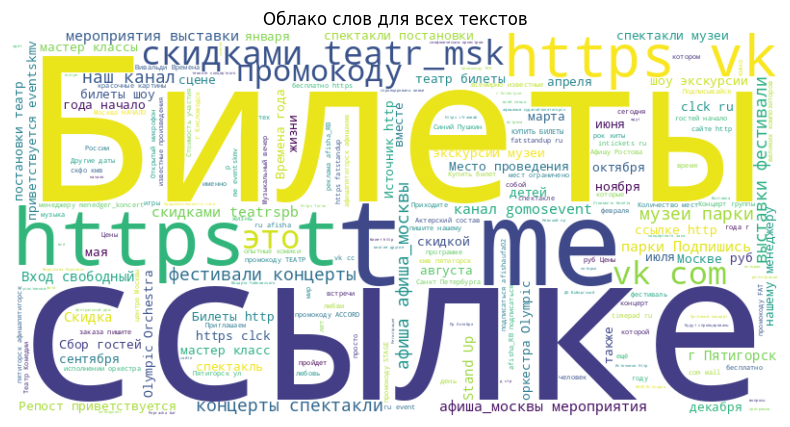

In [ ]:
from wordcloud import WordCloud

text_all = " ".join(train_df['text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text_all)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Облако слов для всех текстов")
plt.show()


## фикс к коду

In [ ]:
import inspect
if not hasattr(inspect, 'getargspec'):
    from collections import namedtuple
    ArgSpec = namedtuple('ArgSpec', 'args varargs keywords defaults')
    def getargspec(func):
        args = inspect.getfullargspec(func)
        return ArgSpec(args.args, args.varargs, args.varkw, args.defaults)
    inspect.getargspec = getargspec

# Чистка tf-idf

In [ ]:
# --- Импорты ---
import re
import pymorphy2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# --- Патч для getargspec (устранение ошибки в Python 3.11) ---
import inspect
if not hasattr(inspect, 'getargspec'):
    from collections import namedtuple
    ArgSpec = namedtuple('ArgSpec', 'args varargs keywords defaults')
    def getargspec(func):
        args = inspect.getfullargspec(func)
        return ArgSpec(args.args, args.varargs, args.varkw, args.defaults)
    inspect.getargspec = getargspec



nltk.download('punkt')
nltk.download('stopwords')

# --- Настройки ---
morph = pymorphy2.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

# --- Функция очистки ---
def clean_for_tfidf(text):
    # Приводим к нижнему регистру
    text = text.lower()

    # Удаляем почты, ссылки, спецсимволы и числа
    text = re.sub(r'http\S+|www\S+', ' ', text)  # Удаляем ссылки
    text = re.sub(r'\S+@\S+', ' ', text)  # Удаляем email адреса
    text = re.sub(r'[^а-яё ]', ' ', text)  # Оставляем только буквы и пробелы

    # Токенизация
    tokens = word_tokenize(text, language='russian')

    # Удаляем стоп-слова и слишком короткие слова, лемматизируем
    tokens = [morph.parse(word)[0].normal_form
              for word in tokens
              if word not in stop_words and len(word) > 2]

    return ' '.join(tokens)

# --- Пример использования ---
example = "Это пример текста, который будет очищен и лемматизирован! Посетите https://example.com или напишите на email@example.com"
cleaned = clean_for_tfidf(example)
print("До:", example)
print("После:", cleaned)


До: Это пример текста, который будет очищен и лемматизирован! Посетите https://example.com или напишите на email@example.com
После: это пример текст который очистить лемматизировать посетить написать


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# TF-IDF

Epoch 1: 100%|██████████| 370/370 [00:01<00:00, 350.68it/s]


Epoch 1: Train Loss=0.6419, Val Loss=0.5283, F1=0.7002


Epoch 2: 100%|██████████| 370/370 [00:00<00:00, 437.68it/s]


Epoch 2: Train Loss=0.4580, Val Loss=0.4034, F1=0.7108


Epoch 3: 100%|██████████| 370/370 [00:00<00:00, 439.06it/s]


Epoch 3: Train Loss=0.3605, Val Loss=0.3246, F1=0.7324


Epoch 4: 100%|██████████| 370/370 [00:01<00:00, 368.45it/s]


Epoch 4: Train Loss=0.2976, Val Loss=0.2778, F1=0.7559


Epoch 5: 100%|██████████| 370/370 [00:00<00:00, 426.47it/s]


Epoch 5: Train Loss=0.2597, Val Loss=0.2500, F1=0.7847


Epoch 6: 100%|██████████| 370/370 [00:00<00:00, 432.73it/s]


Epoch 6: Train Loss=0.2349, Val Loss=0.2324, F1=0.7965


Epoch 7: 100%|██████████| 370/370 [00:00<00:00, 434.32it/s]


Epoch 7: Train Loss=0.2169, Val Loss=0.2207, F1=0.8079


Epoch 8: 100%|██████████| 370/370 [00:00<00:00, 429.41it/s]


Epoch 8: Train Loss=0.2039, Val Loss=0.2154, F1=0.8158


Epoch 9: 100%|██████████| 370/370 [00:00<00:00, 419.86it/s]


Epoch 9: Train Loss=0.1936, Val Loss=0.2108, F1=0.8222


Epoch 10: 100%|██████████| 370/370 [00:00<00:00, 405.30it/s]


Epoch 10: Train Loss=0.1854, Val Loss=0.2083, F1=0.8268


Epoch 11: 100%|██████████| 370/370 [00:01<00:00, 357.14it/s]


Epoch 11: Train Loss=0.1780, Val Loss=0.2065, F1=0.8336


Epoch 12: 100%|██████████| 370/370 [00:00<00:00, 429.48it/s]


Epoch 12: Train Loss=0.1714, Val Loss=0.2062, F1=0.8361


Epoch 13: 100%|██████████| 370/370 [00:00<00:00, 439.20it/s]


Epoch 13: Train Loss=0.1657, Val Loss=0.2056, F1=0.8358


Epoch 14: 100%|██████████| 370/370 [00:00<00:00, 435.14it/s]


Epoch 14: Train Loss=0.1601, Val Loss=0.2046, F1=0.8367


Epoch 15: 100%|██████████| 370/370 [00:00<00:00, 436.10it/s]


Epoch 15: Train Loss=0.1547, Val Loss=0.2046, F1=0.8378


Epoch 16: 100%|██████████| 370/370 [00:00<00:00, 441.78it/s]


Epoch 16: Train Loss=0.1499, Val Loss=0.2044, F1=0.8380


Epoch 17: 100%|██████████| 370/370 [00:01<00:00, 365.29it/s]


Epoch 17: Train Loss=0.1457, Val Loss=0.2044, F1=0.8419


Epoch 18: 100%|██████████| 370/370 [00:00<00:00, 412.71it/s]


Epoch 18: Train Loss=0.1415, Val Loss=0.2044, F1=0.8449


Epoch 19: 100%|██████████| 370/370 [00:00<00:00, 420.47it/s]


Epoch 19: Train Loss=0.1373, Val Loss=0.2046, F1=0.8490


Epoch 20: 100%|██████████| 370/370 [00:00<00:00, 436.98it/s]


Epoch 20: Train Loss=0.1339, Val Loss=0.2045, F1=0.8489


Epoch 21: 100%|██████████| 370/370 [00:00<00:00, 433.27it/s]


Epoch 21: Train Loss=0.1305, Val Loss=0.2049, F1=0.8498
Early stopping triggered.


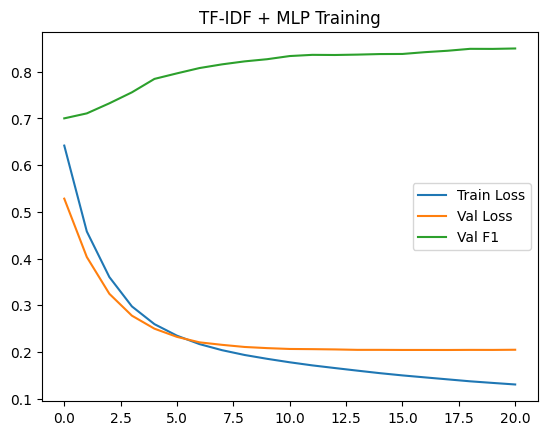

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# ---------- 1. Загрузка и очистка данных ----------
df = pd.read_csv("train.csv")


df['text'] = df['text'].apply(clean_for_tfidf)
df['label'] = df['labels'].apply(lambda x: [int(i) for i in x.split()])
df = df.drop(columns=['labels', 'id'])

# ---------- 2. TF-IDF векторы ----------
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['text']).toarray()
y = np.array(df['label'].tolist())

# ---------- 3. Разделение ----------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- 4. PyTorch Dataset ----------
class TfidfDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TfidfDataset(X_train, y_train)
val_dataset = TfidfDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# ---------- 5. Модель ----------
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, output_dim)
        )

    def forward(self, x):
        return self.model(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP(input_dim=2000, output_dim=y.shape[1]).to(device)

# ---------- 6. Обучение ----------
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=1e-3, steps_per_epoch=len(train_loader), epochs=30
)

# ---------- 7. Тренировка с валидацией, ранней остановкой ----------
best_val_loss = float('inf')
patience = 3
counter = 0
num_epochs = 30

train_losses, val_losses, val_f1s = [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Валидация
    model.eval()
    val_loss = 0.0
    all_probs, all_labels = [], []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            val_loss += loss.item()

            probs = torch.sigmoid(logits).cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(y_batch.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)

    # Оптимальные пороги
    def find_thresholds(probs, labels):
        thresholds = []
        for i in range(probs.shape[1]):
            best_f1, best_t = 0, 0.5
            for t in np.linspace(0.1, 0.9, 17):
                preds = (probs[:, i] > t).astype(int)
                f1 = f1_score(labels[:, i], preds, zero_division=0)
                if f1 > best_f1:
                    best_f1 = f1
                    best_t = t
            thresholds.append(best_t)
        return np.array(thresholds)

    optimal_thresholds = find_thresholds(all_probs, all_labels)
    final_preds = (all_probs > optimal_thresholds).astype(int)
    f1 = f1_score(all_labels, final_preds, average='macro')
    val_f1s.append(f1)

    print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, Val Loss={avg_val_loss:.4f}, F1={f1:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "best_tfidf_mlp.pt")
        np.save("best_thresholds_tfidf.npy", optimal_thresholds)
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

# ---------- 8. Визуализация ----------
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.plot(val_f1s, label="Val F1")
plt.title("TF-IDF + MLP Training")
plt.legend()
plt.show()


## Чистка w2v

In [ ]:
def clean_for_w2v(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)  # Только слово и пробел
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# w2v

Epoch 1: 100%|██████████| 370/370 [00:00<00:00, 509.26it/s]


Epoch 1: Train Loss=0.3610, Val Loss=0.3124, F1=0.7353


Epoch 2: 100%|██████████| 370/370 [00:00<00:00, 498.79it/s]


Epoch 2: Train Loss=0.3057, Val Loss=0.2900, F1=0.7471


Epoch 3: 100%|██████████| 370/370 [00:00<00:00, 432.78it/s]


Epoch 3: Train Loss=0.2907, Val Loss=0.2806, F1=0.7521


Epoch 4: 100%|██████████| 370/370 [00:00<00:00, 420.80it/s]


Epoch 4: Train Loss=0.2811, Val Loss=0.2705, F1=0.7572


Epoch 5: 100%|██████████| 370/370 [00:00<00:00, 490.65it/s]


Epoch 5: Train Loss=0.2754, Val Loss=0.2671, F1=0.7588


Epoch 6: 100%|██████████| 370/370 [00:00<00:00, 482.83it/s]


Epoch 6: Train Loss=0.2709, Val Loss=0.2622, F1=0.7603


Epoch 7: 100%|██████████| 370/370 [00:00<00:00, 496.81it/s]


Epoch 7: Train Loss=0.2668, Val Loss=0.2590, F1=0.7723


Epoch 8: 100%|██████████| 370/370 [00:00<00:00, 491.37it/s]


Epoch 8: Train Loss=0.2639, Val Loss=0.2560, F1=0.7778


Epoch 9: 100%|██████████| 370/370 [00:00<00:00, 506.96it/s]


Epoch 9: Train Loss=0.2613, Val Loss=0.2549, F1=0.7777


Epoch 10: 100%|██████████| 370/370 [00:00<00:00, 471.07it/s]


Epoch 10: Train Loss=0.2591, Val Loss=0.2540, F1=0.7795


Epoch 11: 100%|██████████| 370/370 [00:00<00:00, 375.70it/s]


Epoch 11: Train Loss=0.2568, Val Loss=0.2512, F1=0.7808


Epoch 12: 100%|██████████| 370/370 [00:00<00:00, 486.00it/s]


Epoch 12: Train Loss=0.2548, Val Loss=0.2507, F1=0.7795


Epoch 13: 100%|██████████| 370/370 [00:00<00:00, 469.73it/s]


Epoch 13: Train Loss=0.2531, Val Loss=0.2476, F1=0.7849


Epoch 14: 100%|██████████| 370/370 [00:00<00:00, 488.73it/s]


Epoch 14: Train Loss=0.2521, Val Loss=0.2470, F1=0.7844


Epoch 15: 100%|██████████| 370/370 [00:00<00:00, 488.83it/s]


Epoch 15: Train Loss=0.2501, Val Loss=0.2447, F1=0.7847


Epoch 16: 100%|██████████| 370/370 [00:00<00:00, 505.54it/s]


Epoch 16: Train Loss=0.2490, Val Loss=0.2447, F1=0.7860


Epoch 17: 100%|██████████| 370/370 [00:00<00:00, 495.89it/s]


Epoch 17: Train Loss=0.2478, Val Loss=0.2437, F1=0.7860


Epoch 18: 100%|██████████| 370/370 [00:00<00:00, 383.06it/s]


Epoch 18: Train Loss=0.2466, Val Loss=0.2431, F1=0.7891


Epoch 19: 100%|██████████| 370/370 [00:00<00:00, 492.95it/s]


Epoch 19: Train Loss=0.2457, Val Loss=0.2424, F1=0.7861


Epoch 20: 100%|██████████| 370/370 [00:00<00:00, 469.88it/s]


Epoch 20: Train Loss=0.2439, Val Loss=0.2405, F1=0.7895


Epoch 21: 100%|██████████| 370/370 [00:00<00:00, 509.40it/s]


Epoch 21: Train Loss=0.2440, Val Loss=0.2396, F1=0.7884


Epoch 22: 100%|██████████| 370/370 [00:00<00:00, 484.10it/s]


Epoch 22: Train Loss=0.2428, Val Loss=0.2396, F1=0.7891


Epoch 23: 100%|██████████| 370/370 [00:00<00:00, 480.43it/s]


Epoch 23: Train Loss=0.2415, Val Loss=0.2379, F1=0.7901


Epoch 24: 100%|██████████| 370/370 [00:00<00:00, 502.35it/s]


Epoch 24: Train Loss=0.2411, Val Loss=0.2377, F1=0.7903


Epoch 25: 100%|██████████| 370/370 [00:00<00:00, 398.96it/s]


Epoch 25: Train Loss=0.2403, Val Loss=0.2375, F1=0.7900


Epoch 26: 100%|██████████| 370/370 [00:00<00:00, 498.94it/s]


Epoch 26: Train Loss=0.2394, Val Loss=0.2371, F1=0.7894


Epoch 27: 100%|██████████| 370/370 [00:00<00:00, 493.72it/s]


Epoch 27: Train Loss=0.2383, Val Loss=0.2372, F1=0.7936


Epoch 28: 100%|██████████| 370/370 [00:00<00:00, 472.35it/s]


Epoch 28: Train Loss=0.2373, Val Loss=0.2358, F1=0.7904


Epoch 29: 100%|██████████| 370/370 [00:00<00:00, 510.67it/s]


Epoch 29: Train Loss=0.2368, Val Loss=0.2365, F1=0.7944


Epoch 30: 100%|██████████| 370/370 [00:00<00:00, 487.06it/s]


Epoch 30: Train Loss=0.2361, Val Loss=0.2344, F1=0.7959


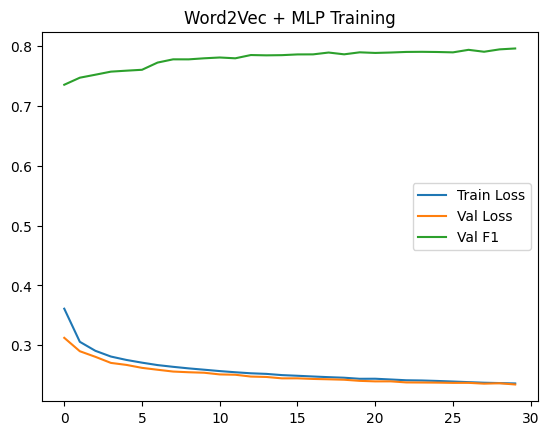

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

# ---------- 1. Загрузка и подготовка ----------
df = pd.read_csv("train.csv")
df['text'] = df['text'].apply(clean_for_w2v)
df['label'] = df['labels'].apply(lambda x: [int(i) for i in x.split()])
df = df.drop(columns=['labels', 'id'])

# Токенизация для Word2Vec
df['tokens'] = df['text'].apply(str.split)

# ---------- 2. Обучение Word2Vec ----------
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=300, window=5, min_count=1, workers=4)
word_vectors = w2v_model.wv
embedding_dim = word_vectors.vector_size

# ---------- 3. Представление текста: усреднение эмбеддингов ----------
def text_to_vec(tokens):
    vectors = [word_vectors[word] for word in tokens if word in word_vectors]
    return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)

df['vector'] = df['tokens'].apply(text_to_vec)

X = np.vstack(df['vector'].values)
y = np.array(df['label'].tolist())

# ---------- 4. Разделение ----------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- 5. Dataset ----------
class WordVecDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = WordVecDataset(X_train, y_train)
val_dataset = WordVecDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# ---------- 6. Модель ----------
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, output_dim)
        )

    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(input_dim=embedding_dim, output_dim=y.shape[1]).to(device)

# ---------- 7. Обучение ----------
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# ---------- 8. Цикл обучения ----------
best_val_loss = float('inf')
patience = 3
counter = 0
num_epochs = 30

train_losses, val_losses, val_f1s = [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Валидация
    model.eval()
    val_loss = 0.0
    all_probs, all_labels = [], []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            val_loss += loss.item()

            probs = torch.sigmoid(logits).cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(y_batch.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)

    # Оптимальные пороги
    def find_thresholds(probs, labels):
        thresholds = []
        for i in range(probs.shape[1]):
            best_f1, best_t = 0, 0.5
            for t in np.linspace(0.1, 0.9, 17):
                preds = (probs[:, i] > t).astype(int)
                f1 = f1_score(labels[:, i], preds, zero_division=0)
                if f1 > best_f1:
                    best_f1 = f1
                    best_t = t
            thresholds.append(best_t)
        return np.array(thresholds)

    optimal_thresholds = find_thresholds(all_probs, all_labels)
    final_preds = (all_probs > optimal_thresholds).astype(int)
    f1 = f1_score(all_labels, final_preds, average='macro')
    val_f1s.append(f1)

    print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, Val Loss={avg_val_loss:.4f}, F1={f1:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "best_w2v_mlp.pt")
        np.save("best_thresholds_w2v.npy", optimal_thresholds)
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

# ---------- 9. Визуализация ----------
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.plot(val_f1s, label="Val F1")
plt.title("Word2Vec + MLP Training")
plt.legend()
plt.show()


## чистка cnn

In [ ]:
def clean_for_cnn(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# cnn

Epoch 1: 100%|██████████| 370/370 [00:01<00:00, 277.46it/s]


Epoch 1: Train Loss=0.3366, Val Loss=0.2783, F1=0.7473


Epoch 2: 100%|██████████| 370/370 [00:00<00:00, 377.13it/s]


Epoch 2: Train Loss=0.2468, Val Loss=0.2502, F1=0.7765


Epoch 3: 100%|██████████| 370/370 [00:01<00:00, 300.54it/s]


Epoch 3: Train Loss=0.2134, Val Loss=0.2289, F1=0.7845


Epoch 4: 100%|██████████| 370/370 [00:00<00:00, 374.89it/s]


Epoch 4: Train Loss=0.1890, Val Loss=0.2232, F1=0.7897


Epoch 5: 100%|██████████| 370/370 [00:00<00:00, 374.84it/s]


Epoch 5: Train Loss=0.1699, Val Loss=0.2188, F1=0.7937


Epoch 6: 100%|██████████| 370/370 [00:00<00:00, 372.78it/s]


Epoch 6: Train Loss=0.1526, Val Loss=0.2162, F1=0.8029


Epoch 7: 100%|██████████| 370/370 [00:00<00:00, 374.74it/s]


Epoch 7: Train Loss=0.1375, Val Loss=0.2159, F1=0.8029


Epoch 8: 100%|██████████| 370/370 [00:00<00:00, 370.41it/s]


Epoch 8: Train Loss=0.1235, Val Loss=0.2192, F1=0.8057


Epoch 9: 100%|██████████| 370/370 [00:01<00:00, 307.60it/s]


Epoch 9: Train Loss=0.1104, Val Loss=0.2227, F1=0.8088


Epoch 10: 100%|██████████| 370/370 [00:01<00:00, 362.61it/s]


Epoch 10: Train Loss=0.0986, Val Loss=0.2264, F1=0.8123
Early stopping triggered.


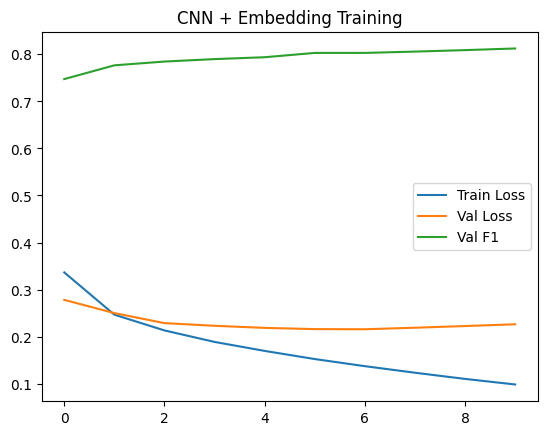

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter

# ---------- 1. Загрузка и подготовка ----------
df = pd.read_csv("train.csv")
df['text'] = df['text'].apply(clean_for_cnn)  # Предобработка в отдельной ячейке
df['label'] = df['labels'].apply(lambda x: [int(i) for i in x.split()])
df = df.drop(columns=['labels', 'id'])

# ---------- 2. Построение словаря и токенизация ----------
tokenized = df['text'].apply(str.split)
all_tokens = [token for sentence in tokenized for token in sentence]
vocab = ['<PAD>', '<UNK>'] + [word for word, _ in Counter(all_tokens).most_common(10000)]
word2idx = {word: idx for idx, word in enumerate(vocab)}

def tokens_to_ids(tokens, max_len=100):
    ids = [word2idx.get(token, word2idx['<UNK>']) for token in tokens]
    if len(ids) < max_len:
        ids += [word2idx['<PAD>']] * (max_len - len(ids))
    else:
        ids = ids[:max_len]
    return ids

df['input_ids'] = tokenized.apply(lambda tokens: tokens_to_ids(tokens))

# ---------- 3. Разделение ----------
X = np.stack(df['input_ids'].values)
y = np.array(df['label'].tolist())

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- 4. Dataset ----------
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TextDataset(X_train, y_train)
val_dataset = TextDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# ---------- 5. Модель: CNN ----------
class CNNTextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, output_dim, pad_idx):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        self.conv = nn.Sequential(
            nn.Conv1d(embed_dim, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(1),
        )
        self.fc = nn.Linear(128, output_dim)

    def forward(self, x):
        x = self.embedding(x)        # [B, L, D]
        x = x.permute(0, 2, 1)       # [B, D, L]
        x = self.conv(x)             # [B, 128, 1]
        x = x.squeeze(2)             # [B, 128]
        return self.fc(x)            # [B, output_dim]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNNTextClassifier(vocab_size=len(vocab), embed_dim=128, output_dim=y.shape[1], pad_idx=word2idx['<PAD>']).to(device)

# ---------- 6. Обучение ----------
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# ---------- 7. Тренировка ----------
best_val_loss = float('inf')
patience = 3
counter = 0
num_epochs = 30

train_losses, val_losses, val_f1s = [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Валидация
    model.eval()
    val_loss = 0.0
    all_probs, all_labels = [], []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            val_loss += loss.item()
            probs = torch.sigmoid(logits).cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(y_batch.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)

    def find_thresholds(probs, labels):
        thresholds = []
        for i in range(probs.shape[1]):
            best_f1, best_t = 0, 0.5
            for t in np.linspace(0.1, 0.9, 17):
                preds = (probs[:, i] > t).astype(int)
                f1 = f1_score(labels[:, i], preds, zero_division=0)
                if f1 > best_f1:
                    best_f1 = f1
                    best_t = t
            thresholds.append(best_t)
        return np.array(thresholds)

    optimal_thresholds = find_thresholds(all_probs, all_labels)
    final_preds = (all_probs > optimal_thresholds).astype(int)
    f1 = f1_score(all_labels, final_preds, average='macro')
    val_f1s.append(f1)

    print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, Val Loss={avg_val_loss:.4f}, F1={f1:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "best_cnn_embed.pt")
        np.save("best_thresholds_cnn.npy", optimal_thresholds)
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

# ---------- 8. Визуализация ----------
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.plot(val_f1s, label="Val F1")
plt.title("CNN + Embedding Training")
plt.legend()
plt.show()


## чистка rnn

In [ ]:
def clean_for_rnn(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)  # Удаляем пунктуацию
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# rnn

Epoch 1: 100%|██████████| 370/370 [00:02<00:00, 137.87it/s]


Epoch 1: Train Loss=0.3405, Val Loss=0.2816, F1=0.7449


Epoch 2: 100%|██████████| 370/370 [00:02<00:00, 147.71it/s]


Epoch 2: Train Loss=0.2636, Val Loss=0.2514, F1=0.7689


Epoch 3: 100%|██████████| 370/370 [00:02<00:00, 147.92it/s]


Epoch 3: Train Loss=0.2367, Val Loss=0.2331, F1=0.7830


Epoch 4: 100%|██████████| 370/370 [00:02<00:00, 139.98it/s]


Epoch 4: Train Loss=0.2158, Val Loss=0.2174, F1=0.7925


Epoch 5: 100%|██████████| 370/370 [00:02<00:00, 145.78it/s]


Epoch 5: Train Loss=0.1978, Val Loss=0.2098, F1=0.7984


Epoch 6: 100%|██████████| 370/370 [00:02<00:00, 145.45it/s]


Epoch 6: Train Loss=0.1820, Val Loss=0.2044, F1=0.8034


Epoch 7: 100%|██████████| 370/370 [00:02<00:00, 138.40it/s]


Epoch 7: Train Loss=0.1670, Val Loss=0.2000, F1=0.8064


Epoch 8: 100%|██████████| 370/370 [00:02<00:00, 144.68it/s]


Epoch 8: Train Loss=0.1541, Val Loss=0.2003, F1=0.8083


Epoch 9: 100%|██████████| 370/370 [00:02<00:00, 143.93it/s]


Epoch 9: Train Loss=0.1423, Val Loss=0.2000, F1=0.8112


Epoch 10: 100%|██████████| 370/370 [00:02<00:00, 140.73it/s]


Epoch 10: Train Loss=0.1301, Val Loss=0.2032, F1=0.8130


Epoch 11: 100%|██████████| 370/370 [00:02<00:00, 142.83it/s]


Epoch 11: Train Loss=0.1209, Val Loss=0.2090, F1=0.8156


Epoch 12: 100%|██████████| 370/370 [00:02<00:00, 142.72it/s]


Epoch 12: Train Loss=0.1121, Val Loss=0.2120, F1=0.8192
Early stopping triggered.


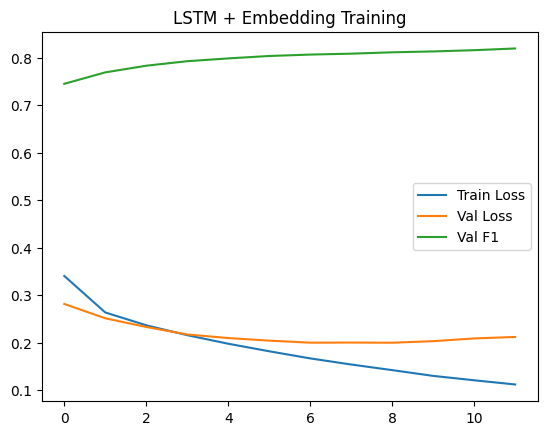

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter

# ---------- 1. Загрузка и подготовка ----------
df = pd.read_csv("train.csv")
df['text'] = df['text'].apply(clean_for_rnn)  # Используем вашу очистку
df['label'] = df['labels'].apply(lambda x: [int(i) for i in x.split()])
df = df.drop(columns=['labels', 'id'])

# ---------- 2. Построение словаря и токенизация ----------
tokenized = df['text'].apply(str.split)
all_tokens = [token for sentence in tokenized for token in sentence]
vocab = ['<PAD>', '<UNK>'] + [word for word, _ in Counter(all_tokens).most_common(10000)]
word2idx = {word: idx for idx, word in enumerate(vocab)}

def tokens_to_ids(tokens, max_len=100):
    ids = [word2idx.get(token, word2idx['<UNK>']) for token in tokens]
    if len(ids) < max_len:
        ids += [word2idx['<PAD>']] * (max_len - len(ids))
    else:
        ids = ids[:max_len]
    return ids

df['input_ids'] = tokenized.apply(lambda tokens: tokens_to_ids(tokens))

# ---------- 3. Разделение ----------
X = np.stack(df['input_ids'].values)
y = np.array(df['label'].tolist())

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- 4. Dataset ----------
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TextDataset(X_train, y_train)
val_dataset = TextDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# ---------- 5. Модель: LSTM ----------
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, pad_idx):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # ×2 из-за bidirectional

    def forward(self, x):
        embedded = self.embedding(x)                      # [B, L, D]
        lstm_out, _ = self.lstm(embedded)                 # [B, L, 2*H]
        pooled = torch.mean(lstm_out, dim=1)              # усреднение по длине
        return self.fc(self.dropout(pooled))              # [B, output_dim]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMClassifier(vocab_size=len(vocab), embed_dim=128, hidden_dim=128, output_dim=y.shape[1], pad_idx=word2idx['<PAD>']).to(device)

# ---------- 6. Обучение ----------
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# ---------- 7. Тренировка ----------
best_val_loss = float('inf')
patience = 3
counter = 0
num_epochs = 30

train_losses, val_losses, val_f1s = [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Валидация
    model.eval()
    val_loss = 0.0
    all_probs, all_labels = [], []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            val_loss += loss.item()
            probs = torch.sigmoid(logits).cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(y_batch.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)

    def find_thresholds(probs, labels):
        thresholds = []
        for i in range(probs.shape[1]):
            best_f1, best_t = 0, 0.5
            for t in np.linspace(0.1, 0.9, 17):
                preds = (probs[:, i] > t).astype(int)
                f1 = f1_score(labels[:, i], preds, zero_division=0)
                if f1 > best_f1:
                    best_f1 = f1
                    best_t = t
            thresholds.append(best_t)
        return np.array(thresholds)

    optimal_thresholds = find_thresholds(all_probs, all_labels)
    final_preds = (all_probs > optimal_thresholds).astype(int)
    f1 = f1_score(all_labels, final_preds, average='macro')
    val_f1s.append(f1)

    print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, Val Loss={avg_val_loss:.4f}, F1={f1:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "best_lstm_embed.pt")
        np.save("best_thresholds_lstm.npy", optimal_thresholds)
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

# ---------- 8. Визуализация ----------
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.plot(val_f1s, label="Val F1")
plt.title("LSTM + Embedding Training")
plt.legend()
plt.show()


## чистка берт

In [ ]:
import re
import pandas as pd

def clean_for_bert(text):
    # Удаляем ссылки
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Удаляем email-адреса
    text = re.sub(r'\S+@\S+', '', text)
    # Удаляем HTML-теги
    text = re.sub(r'<.*?>', '', text)
    # Удаляем управляющие символы и лишние пробелы
    text = re.sub(r'[\r\n\t]+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [ ]:

# 1. Загрузка и подготовка данных
train_df = pd.read_csv('train.csv')

# Чистим тексты
train_df['text'] = train_df['text'].apply(clean_for_bert)

# Преобразуем строку меток в список из 0 и 1
train_df["label"] = train_df["labels"].apply(lambda x: list(map(int, x.split())))

# Удаляем ненужные колонки
train_df = train_df.drop(columns=["labels", "id"])

train_df.head()


,text,label
0,15 января Детская развлекательная программа 15...,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, ..."
1,13 и 14 августа Выходные в Меге Мегапарк,"[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ..."
2,Йокнапатофа Постановка Театр им. Маяковского Б...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
3,Впервые в Уфе танцевальная терапия в группе с ...,"[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"🎹 GRAND PIANO COMPETITION 🎹 Друзья, сегодня от...","[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, ..."


# берт + каггл

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/23654 [00:00<?, ? examples/s]

Map:   0%|          | 0/5914 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1: 100%|██████████| 1479/1479 [00:39<00:00, 37.52it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1: Train Loss = 0.3367, Val Loss = 0.2572, F1 = 0.7737, Precision = 0.7684, Recall = 0.8049


Epoch 2: 100%|██████████| 1479/1479 [00:38<00:00, 37.93it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2: Train Loss = 0.2327, Val Loss = 0.2205, F1 = 0.7949, Precision = 0.8195, Recall = 0.8140


Epoch 3: 100%|██████████| 1479/1479 [00:39<00:00, 37.81it/s]


Epoch 3: Train Loss = 0.1912, Val Loss = 0.1961, F1 = 0.8096, Precision = 0.8045, Recall = 0.8223


Epoch 4: 100%|██████████| 1479/1479 [00:38<00:00, 37.96it/s]


Epoch 4: Train Loss = 0.1551, Val Loss = 0.1750, F1 = 0.8296, Precision = 0.8533, Recall = 0.8341


Epoch 5: 100%|██████████| 1479/1479 [00:39<00:00, 37.90it/s]


Epoch 5: Train Loss = 0.1253, Val Loss = 0.1646, F1 = 0.8314, Precision = 0.8584, Recall = 0.8426


Epoch 6: 100%|██████████| 1479/1479 [00:39<00:00, 37.89it/s]


Epoch 6: Train Loss = 0.1037, Val Loss = 0.1633, F1 = 0.8354, Precision = 0.8680, Recall = 0.8479


Epoch 7: 100%|██████████| 1479/1479 [00:39<00:00, 37.87it/s]


Epoch 7: Train Loss = 0.0858, Val Loss = 0.1661, F1 = 0.8450, Precision = 0.8411, Recall = 0.8550


Epoch 8: 100%|██████████| 1479/1479 [00:39<00:00, 37.78it/s]


Epoch 8: Train Loss = 0.0717, Val Loss = 0.1711, F1 = 0.8455, Precision = 0.8561, Recall = 0.8502
Early stopping triggered!


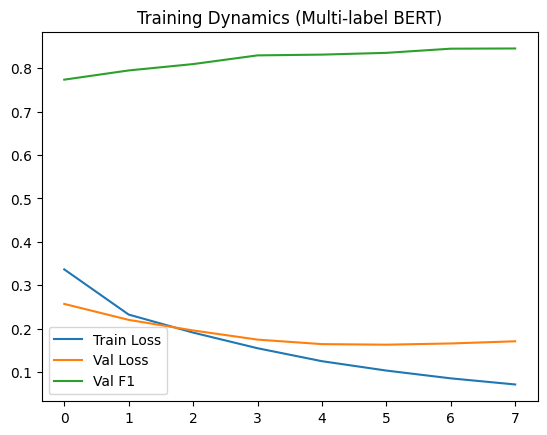

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
from torch.optim import AdamW
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Загрузка и подготовка данных
train_df = pd.read_csv('train.csv')

# 🔧 Преобразуем строку меток в список из 0 и 1
train_df["label"] = train_df["labels"].apply(lambda x: [int(i) for i in x.strip().split()])
train_df = train_df.drop(columns=["labels", "id"])

# Разделение
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)
train_dataset = Dataset.from_pandas(train_data.reset_index(drop=True))
val_dataset = Dataset.from_pandas(val_data.reset_index(drop=True))

# 2. Токенизация
model_name = "cointegrated/rubert-tiny2"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize(example):
    tokenized = tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)
    tokenized["label"] = [float(x) for x in example["label"]]  # список float
    return tokenized

train_dataset = train_dataset.map(tokenize)
val_dataset = val_dataset.map(tokenize)

# Установка формата
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# 3. DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# 4. Модель
num_labels = len(train_df["label"].iloc[0])
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    problem_type="multi_label_classification"
).to("cuda")

# 5. Оптимизатор, шедулер
optimizer = AdamW(model.parameters(), lr=5e-5)
num_epochs = 30
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=200, num_training_steps=num_training_steps
)

# 6. Loss, метрики, подготовка
criterion = torch.nn.BCEWithLogitsLoss()
train_losses, val_losses, val_f1s = [], [], []

best_val_loss = float('inf')
patience, patience_counter = 2, 0
save_path = "best_multilabel_bert.pt"

# Функция подбора оптимальных трешхолдов
def find_best_thresholds(probs, true_labels):
    best_thresholds = []
    for i in range(probs.shape[1]):
        best_f1, best_thresh = 0, 0.5
        for t in np.linspace(0.1, 0.9, 17):
            preds = (probs[:, i] > t).astype(int)
            f1 = f1_score(true_labels[:, i], preds, zero_division=0)
            if f1 > best_f1:
                best_f1 = f1
                best_thresh = t
        best_thresholds.append(best_thresh)
    return np.array(best_thresholds)

# 7. Обучение
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        batch = {k: v.to("cuda") for k, v in batch.items()}
        labels = batch["label"].float()
        outputs = model(input_ids=batch["input_ids"], attention_mask=batch["attention_mask"])
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Валидация
    model.eval()
    running_val_loss = 0.0
    all_probs, all_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to("cuda") for k, v in batch.items()}
            labels = batch["label"].float()
            outputs = model(input_ids=batch["input_ids"], attention_mask=batch["attention_mask"])
            loss = criterion(outputs.logits, labels)
            running_val_loss += loss.item()
            probs = torch.sigmoid(outputs.logits).cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(labels.cpu().numpy())

    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)

    # Подбор порогов и финальные предсказания
    optimal_thresholds = find_best_thresholds(all_probs, all_labels)
    final_preds = (all_probs > optimal_thresholds).astype(int)

    f1 = f1_score(all_labels, final_preds, average="macro")
    precision = precision_score(all_labels, final_preds, average="macro")
    recall = recall_score(all_labels, final_preds, average="macro")
    val_f1s.append(f1)

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}, "
          f"F1 = {f1:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), save_path)
        np.save("best_thresholds.npy", optimal_thresholds)
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

# 8. Визуализация
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.plot(val_f1s, label="Val F1")
plt.legend()
plt.title("Training Dynamics (Multi-label BERT)")
plt.show()


# предикшн на каггл

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm

# Загрузка тестового датасета
test_df = pd.read_csv("test.csv")

# Параметры
model_name = "cointegrated/rubert-tiny2"
batch_size = 16
max_length = 128
num_labels = 20  # число меток

# Подгружаем токенизатор и модель
tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=num_labels, problem_type="multi_label_classification"
).to("cuda")

# Загружаем лучшие веса
model.load_state_dict(torch.load("best_multilabel_bert.pt"))
model.eval()

# Загружаем сохранённые трешхолды
optimal_thresholds = np.load("best_thresholds.npy")

# Класс датасета
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, texts):
        self.encodings = tokenizer(texts, truncation=True, padding="max_length",
                                   max_length=max_length, return_tensors="pt")

    def __len__(self):
        return len(self.encodings["input_ids"])

    def __getitem__(self, idx):
        return {
            "input_ids": self.encodings["input_ids"][idx],
            "attention_mask": self.encodings["attention_mask"][idx]
        }

# Подготовка данных
test_dataset = TestDataset(test_df["text"].tolist())
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Предсказание
all_probs = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Predicting"):
        input_ids = batch["input_ids"].to("cuda")
        attention_mask = batch["attention_mask"].to("cuda")
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        probs = torch.sigmoid(outputs.logits).cpu().numpy()
        all_probs.append(probs)

all_probs = np.vstack(all_probs)

# Применение оптимальных трешхолдов
preds = (all_probs > optimal_thresholds).astype(int)

# Формирование submission.csv
test_df["labels"] = [" ".join(map(str, row)) for row in preds]
submission_df = test_df[["id", "labels"]]
submission_df.to_csv("submission.csv", index=False)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Predicting: 100%|██████████| 462/462 [00:02<00:00, 177.49it/s]


In [ ]:
from google.colab import files
files.download("submission.csv")


# Генерация с декодером ниже

In [ ]:
import numpy as np

label_matrix = np.array(train_df["label"].to_list())
label_freq = label_matrix.mean(axis=0)  # средняя частота каждой метки


In [ ]:
from datasets import Dataset
gen_data = pd.DataFrame({
    "input_text": [" ".join(map(str, label)) for label in train_df["label"]],
    "target_text": train_df["text"]
})
gen_dataset = Dataset.from_pandas(gen_data)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from random import choices
import torch

# 1. Загрузка генеративной модели
gen_model_name = "google/flan-t5-small"  # Можешь заменить на свою
gen_tokenizer = AutoTokenizer.from_pretrained(gen_model_name)
gen_model = AutoModelForSeq2SeqLM.from_pretrained(gen_model_name).to("cuda")

# 2. Генерация входов из случайных меток
random_labels = train_df["label"].sample(n=1000, replace=True).to_list()
gen_inputs = [" ".join(map(str, label)) for label in random_labels]

# 3. Токенизация
gen_tokenized = gen_tokenizer(gen_inputs, return_tensors="pt", padding=True, truncation=True).to("cuda")

# 4. Генерация
with torch.no_grad():
    gen_outputs = gen_model.generate(
        **gen_tokenized,
        max_new_tokens=100,
        num_return_sequences=1
    )

# 5. Декодирование
generated_texts = gen_tokenizer.batch_decode(gen_outputs, skip_special_tokens=True)


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
generated_df = pd.DataFrame({
    "text": generated_texts,
    "label": random_labels
})

augmented_train_df = pd.concat([train_df, generated_df], ignore_index=True)
augmented_train_df.tail(10)


,text,label
30558,0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 ...,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, ..."
30559,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ..."
30560,0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 ...,"[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, ..."
30561,1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 ...,"[1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, ..."
30562,0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 ...,"[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, ..."
30563,1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 ...,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ..."
30564,0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0,"[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ..."
30565,1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,"[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ..."
30566,0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 ...,"[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ..."
30567,1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 ...,"[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, ..."


In [ ]:
import pandas as pd
from transformers import AutoTokenizer
import ast

# Загрузка генераций
gen_df = generated_df
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rut5-base")  # или твоя модель

def clean_generated_text(text):
    # Убираем спецтокены
    if pd.isna(text):
        return ""
    for tok in tokenizer.additional_special_tokens:
        text = text.replace(tok, "")
    return text.strip()

# Применим очистку
gen_df["text"] = gen_df["text"].astype(str).apply(clean_generated_text)

# Парсим метки, если они записаны как строки
def parse_label(label):
    if isinstance(label, str):
        try:
            return ast.literal_eval(label)
        except:
            return None
    return label

gen_df["label"] = gen_df["label"].apply(parse_label)

# Фильтрация: удалим строки с пустым текстом или некорректными метками
num_labels = len(train_df["label"].iloc[0])
gen_df = gen_df[gen_df["text"].str.split().str.len() > 5]
gen_df = gen_df[gen_df["label"].apply(lambda x: isinstance(x, list) and len(x) == num_labels)]

# Оставим первые 1000
gen_df = gen_df.head(1000).reset_index(drop=True)


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
# Объединим с исходным train_df
augmented_df = pd.concat([train_df, gen_df], ignore_index=True)
# 🔧 Преобразуем строку меток в список из 0 и 1
augmented_df = augmented_df.drop(columns=["label"])
augmented_df

,text
0,15 января\nДетская развлекательная программа\n...
1,13 и 14 августа\nВыходные в Меге\nhttps://t.me...
2,Йокнапатофа\nПостановка Театр им. Маяковского\...
3,Впервые в Уфе танцевальная терапия в группе с ...
4,"🎹\nGRAND PIANO COMPETITION\n🎹\nДрузья, сегодня..."
...,...
30527,1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 ...
30528,0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0
30529,1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
30530,0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 ...


Map:   0%|          | 0/24425 [00:00<?, ? examples/s]

Map:   0%|          | 0/6107 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1: 100%|██████████| 1527/1527 [00:40<00:00, 37.32it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1: Train Loss = 0.3432, Val Loss = 0.2643, F1 = 0.7653, Precision = 0.7550, Recall = 0.7972


Epoch 2: 100%|██████████| 1527/1527 [00:40<00:00, 37.77it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2: Train Loss = 0.2390, Val Loss = 0.2260, F1 = 0.7973, Precision = 0.7861, Recall = 0.8228


Epoch 3: 100%|██████████| 1527/1527 [00:40<00:00, 37.57it/s]


Epoch 3: Train Loss = 0.1972, Val Loss = 0.1985, F1 = 0.8177, Precision = 0.8112, Recall = 0.8304


Epoch 4: 100%|██████████| 1527/1527 [00:40<00:00, 37.73it/s]


Epoch 4: Train Loss = 0.1625, Val Loss = 0.1814, F1 = 0.8296, Precision = 0.8562, Recall = 0.8401


Epoch 5: 100%|██████████| 1527/1527 [00:40<00:00, 37.61it/s]


Epoch 5: Train Loss = 0.1338, Val Loss = 0.1709, F1 = 0.8377, Precision = 0.8549, Recall = 0.8419


Epoch 6: 100%|██████████| 1527/1527 [00:40<00:00, 37.66it/s]


Epoch 6: Train Loss = 0.1116, Val Loss = 0.1680, F1 = 0.8454, Precision = 0.8808, Recall = 0.8434


Epoch 7: 100%|██████████| 1527/1527 [00:40<00:00, 37.74it/s]


Epoch 7: Train Loss = 0.0945, Val Loss = 0.1661, F1 = 0.8450, Precision = 0.8717, Recall = 0.8460


Epoch 8: 100%|██████████| 1527/1527 [00:40<00:00, 37.71it/s]


Epoch 8: Train Loss = 0.0801, Val Loss = 0.1691, F1 = 0.8463, Precision = 0.8766, Recall = 0.8445


Epoch 9: 100%|██████████| 1527/1527 [00:40<00:00, 37.65it/s]


Epoch 9: Train Loss = 0.0682, Val Loss = 0.1727, F1 = 0.8533, Precision = 0.8771, Recall = 0.8536
Early stopping triggered!


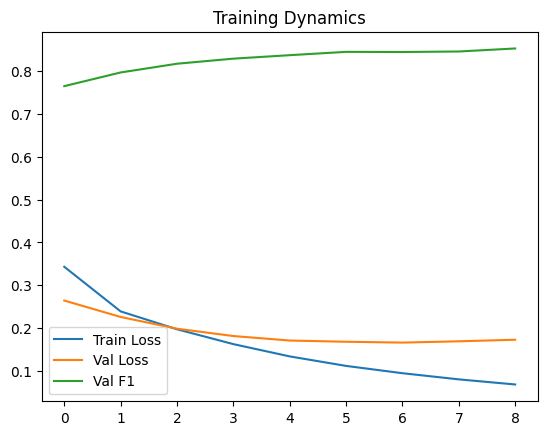

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
from torch.optim import AdamW
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 🧩 Загрузка начальных данных (если нужно)
# train_df = pd.read_csv("train.csv")
# train_df["label"] = train_df["label"].apply(eval)

# 🛠 Преобразуем сгенерированные метки из строк в списки
gen_df["label"] = gen_df["label"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# ✅ Объединение оригинальных и сгенерированных данных
augmented_df = pd.concat([train_df, gen_df], ignore_index=True)

# 🔍 Убедимся, что метки корректные
augmented_df = augmented_df[augmented_df["label"].apply(lambda x: isinstance(x, list) and all(isinstance(i, (int, float)) for i in x))]
label_len = len(augmented_df["label"].iloc[0])
augmented_df = augmented_df[augmented_df["label"].apply(lambda x: len(x) == label_len)]

# 📊 Разделение на train/val
train_data, val_data = train_test_split(augmented_df, test_size=0.2, random_state=42)
train_dataset = Dataset.from_pandas(train_data.reset_index(drop=True))
val_dataset = Dataset.from_pandas(val_data.reset_index(drop=True))

# 🔤 Токенизация
model_name = "cointegrated/rubert-tiny2"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize(example):
    tokenized = tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)
    tokenized["label"] = torch.tensor(example["label"], dtype=torch.float)
    return tokenized

train_dataset = train_dataset.map(tokenize)
val_dataset = val_dataset.map(tokenize)
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# 🔁 DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# 🧠 Модель
num_labels = label_len
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    problem_type="multi_label_classification"
).to("cuda")

# ⚙️ Оптимизатор и шедулер
optimizer = AdamW(model.parameters(), lr=5e-5)
num_epochs = 30
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=200, num_training_steps=num_training_steps
)

# 🔥 Обучение
criterion = torch.nn.BCEWithLogitsLoss()
train_losses, val_losses, val_f1s = [], [], []
best_val_loss = float('inf')
patience, patience_counter = 2, 0
save_path = "best_multilabel_bert.pt"

# 📐 Подбор оптимальных порогов
def find_best_thresholds(probs, true_labels):
    best_thresholds = []
    for i in range(probs.shape[1]):
        best_f1, best_thresh = 0, 0.5
        for t in np.linspace(0.1, 0.9, 17):
            preds = (probs[:, i] > t).astype(int)
            f1 = f1_score(true_labels[:, i], preds, zero_division=0)
            if f1 > best_f1:
                best_f1 = f1
                best_thresh = t
        best_thresholds.append(best_thresh)
    return np.array(best_thresholds)

# 🚀 Цикл обучения
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        batch = {k: v.to("cuda") for k, v in batch.items()}
        labels = batch["label"].float()
        outputs = model(input_ids=batch["input_ids"], attention_mask=batch["attention_mask"])
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 🧪 Валидация
    model.eval()
    running_val_loss = 0.0
    all_probs, all_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to("cuda") for k, v in batch.items()}
            labels = batch["label"].float()
            outputs = model(input_ids=batch["input_ids"], attention_mask=batch["attention_mask"])
            loss = criterion(outputs.logits, labels)
            running_val_loss += loss.item()
            probs = torch.sigmoid(outputs.logits).cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(labels.cpu().numpy())

    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)

    thresholds = find_best_thresholds(all_probs, all_labels)
    preds = (all_probs > thresholds).astype(int)

    f1 = f1_score(all_labels, preds, average="macro")
    precision = precision_score(all_labels, preds, average="macro")
    recall = recall_score(all_labels, preds, average="macro")
    val_f1s.append(f1)

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}, "
          f"F1 = {f1:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), save_path)
        np.save("best_thresholds.npy", thresholds)
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

# 📈 График
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.plot(val_f1s, label="Val F1")
plt.title("Training Dynamics")
plt.legend()
plt.show()


# Код для предикшна на кагл ниже

In [ ]:
from google.colab import files
uploaded = files.upload()  # Выбери файл .zip или отдельные файлы

In [ ]:
import re
import pandas as pd

def clean_for_bert(text):
    # Удаляем ссылки
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Удаляем email-адреса
    text = re.sub(r'\S+@\S+', '', text)
    # Удаляем HTML-теги
    text = re.sub(r'<.*?>', '', text)
    # Удаляем управляющие символы и лишние пробелы
    text = re.sub(r'[\r\n\t]+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 1. Загрузка и подготовка данных
train_df = pd.read_csv('train.csv')

# Чистим тексты
train_df['text'] = train_df['text'].apply(clean_for_bert)

# Преобразуем строку меток в список из 0 и 1
train_df["label"] = train_df["labels"].apply(lambda x: list(map(int, x.split())))

# Удаляем ненужные колонки
train_df = train_df.drop(columns=["labels", "id"])

train_df.head()
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
from torch.optim import AdamW
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Загрузка и подготовка данных
train_df = pd.read_csv('train.csv')

# 🔧 Преобразуем строку меток в список из 0 и 1
train_df["label"] = train_df["labels"].apply(lambda x: [int(i) for i in x.strip().split()])
train_df = train_df.drop(columns=["labels", "id"])

# Разделение
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)
train_dataset = Dataset.from_pandas(train_data.reset_index(drop=True))
val_dataset = Dataset.from_pandas(val_data.reset_index(drop=True))

# 2. Токенизация
model_name = "cointegrated/rubert-tiny2"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize(example):
    tokenized = tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)
    tokenized["label"] = [float(x) for x in example["label"]]  # список float
    return tokenized

train_dataset = train_dataset.map(tokenize)
val_dataset = val_dataset.map(tokenize)

# Установка формата
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# 3. DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# 4. Модель
num_labels = len(train_df["label"].iloc[0])
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    problem_type="multi_label_classification"
).to("cuda")

# 5. Оптимизатор, шедулер
optimizer = AdamW(model.parameters(), lr=5e-5)
num_epochs = 30
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=200, num_training_steps=num_training_steps
)

# 6. Loss, метрики, подготовка
criterion = torch.nn.BCEWithLogitsLoss()
train_losses, val_losses, val_f1s = [], [], []

best_val_loss = float('inf')
patience, patience_counter = 2, 0
save_path = "best_multilabel_bert.pt"

# Функция подбора оптимальных трешхолдов
def find_best_thresholds(probs, true_labels):
    best_thresholds = []
    for i in range(probs.shape[1]):
        best_f1, best_thresh = 0, 0.5
        for t in np.linspace(0.1, 0.9, 17):
            preds = (probs[:, i] > t).astype(int)
            f1 = f1_score(true_labels[:, i], preds, zero_division=0)
            if f1 > best_f1:
                best_f1 = f1
                best_thresh = t
        best_thresholds.append(best_thresh)
    return np.array(best_thresholds)

# 7. Обучение
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        batch = {k: v.to("cuda") for k, v in batch.items()}
        labels = batch["label"].float()
        outputs = model(input_ids=batch["input_ids"], attention_mask=batch["attention_mask"])
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Валидация
    model.eval()
    running_val_loss = 0.0
    all_probs, all_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to("cuda") for k, v in batch.items()}
            labels = batch["label"].float()
            outputs = model(input_ids=batch["input_ids"], attention_mask=batch["attention_mask"])
            loss = criterion(outputs.logits, labels)
            running_val_loss += loss.item()
            probs = torch.sigmoid(outputs.logits).cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(labels.cpu().numpy())

    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)

    # Подбор порогов и финальные предсказания
    optimal_thresholds = find_best_thresholds(all_probs, all_labels)
    final_preds = (all_probs > optimal_thresholds).astype(int)

    f1 = f1_score(all_labels, final_preds, average="macro")
    precision = precision_score(all_labels, final_preds, average="macro")
    recall = recall_score(all_labels, final_preds, average="macro")
    val_f1s.append(f1)

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}, "
          f"F1 = {f1:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), save_path)
        np.save("best_thresholds.npy", optimal_thresholds)
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

# 8. Визуализация
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.plot(val_f1s, label="Val F1")
plt.legend()
plt.title("Training Dynamics (Multi-label BERT)")
plt.show()


In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm

# Загрузка тестового датасета
test_df = pd.read_csv("test.csv")

# Параметры
model_name = "cointegrated/rubert-tiny2"
batch_size = 16
max_length = 128
num_labels = 20  # число меток

# Подгружаем токенизатор и модель
tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=num_labels, problem_type="multi_label_classification"
).to("cuda")

# Загружаем лучшие веса
model.load_state_dict(torch.load("best_multilabel_bert.pt"))
model.eval()

# Загружаем сохранённые трешхолды
optimal_thresholds = np.load("best_thresholds.npy")

# Класс датасета
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, texts):
        self.encodings = tokenizer(texts, truncation=True, padding="max_length",
                                   max_length=max_length, return_tensors="pt")

    def __len__(self):
        return len(self.encodings["input_ids"])

    def __getitem__(self, idx):
        return {
            "input_ids": self.encodings["input_ids"][idx],
            "attention_mask": self.encodings["attention_mask"][idx]
        }

# Подготовка данных
test_dataset = TestDataset(test_df["text"].tolist())
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Предсказание
all_probs = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Predicting"):
        input_ids = batch["input_ids"].to("cuda")
        attention_mask = batch["attention_mask"].to("cuda")
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        probs = torch.sigmoid(outputs.logits).cpu().numpy()
        all_probs.append(probs)

all_probs = np.vstack(all_probs)

# Применение оптимальных трешхолдов
preds = (all_probs > optimal_thresholds).astype(int)

# Формирование submission.csv
test_df["labels"] = [" ".join(map(str, row)) for row in preds]
submission_df = test_df[["id", "labels"]]
submission_df.to_csv("submission.csv", index=False)
